<a href="https://colab.research.google.com/github/nyp-sit/sdaai-staff-repo/blob/master/iti103/session-5(learning-problems)/plot_learning_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" align="left"/></a>

# Regularization and Gradient Descent

Welcome to the programming exercise. This is part of the series of exercises to help you acquire skills in different techniques to fine-tune your model.

**You will learn:**
- how regularization can be used to avoid overfitting the data
- effects of different regularization techniques (e.g. L1/L2)
- apply regularization to a real data set and improve regression prediction accuracy 
- see the effects of scaling on the Stochastic Gradient Descent models



## Part 1: Regularization  

We will begin with a short tutorial on regularization based on a very simple generated 'noisy' dataset and examine the effects of regularization on the model. 

### 1.1 Import required libraries

In [1]:
from __future__ import print_function

import warnings
warnings.filterwarnings('ignore', module='sklearn')

import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# common import
import os


/Users/markk/anaconda/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 1.2. Import a Data Set and Plot the Data

Import the file 'X_Y_Sinusoid_Data.csv' which contains a noisy set of x and y values that corresponds to a function $y = sin(2\pi x)$

In [2]:
data_path = ['data']
filepath = os.sep.join(data_path + ['X_Y_Sinusoid_data.csv'])
data = pd.read_csv(filepath)

Now we will create a set of x and y values that corresponds to the ground truth $y = sin(2\pi x)$ and plot the sparse data (`x` vs `y`) and the calculated ("real") data.

***Exercise:***

Generate 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

***Hint:***
- use the np.linspace() to generate the required x values
- use the np.sin() for the sine function and np.pi for the constant $\pi$

<details>
<summary>Answer</summary>
<p>

```python
X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)
```

</p>
</details>

In [3]:
### START CODE HERE ###

## X_real = None 
## Y_real = None
X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

### END CODE HERE ###

In [4]:
print(type(data.set_index('x')['y']))

<class 'pandas.core.series.Series'>


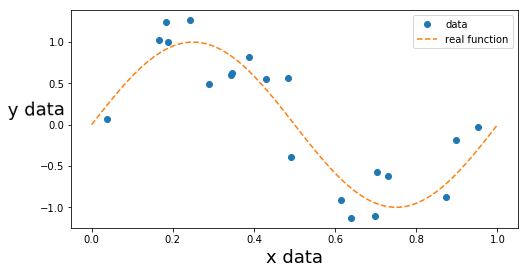

In [5]:
#plot the 'noisy' data
plt.figure(figsize=(8,4))
plt.plot(data['x'], data['y'], "o", label='data')
plt.xlabel("x data", fontsize=18)
plt.ylabel("y data", fontsize=18, rotation='1')
#plot the real function
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.legend()
plt.show()

### 1.3. Fit the model with higher-oder polynomial features

***Exercise:***

Using the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class from Scikit-learn's preprocessing library, create 20th order polynomial features.

<br>
<details>
    <summary>Answer</summary>
<p>

```python
X_data = data['x']
Y_data = data['y']

degree = 20
pf = PolynomialFeatures(degree)
X_poly = pf.fit_transform(X_data)

```

</p>
</details>

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### START CODE HERE ###

# Extract the X- and Y- data from the dataframe 
X_data = None
Y_data = None 

# Setup the polynomial features
degree = 0
pf = None

# Create the polynomial features
X_poly = None

### END CODE HERE ###

# Answer
X_data = data[['x']]
Y_data = data[['y']]

degree = 20
pf = PolynomialFeatures(degree)
X_poly = pf.fit_transform(X_data)

#print(X_poly.shape)

X_data has the 20 data points. What do you think is the shape of X_poly? 

<br>
<details>
    <summary>Answer</summary>
<p>

(20,21). Although we specify degree 20 for the polynomial features, 21 features were generated because of the additional bias term. You can omit the bias term by specifying:
    
```python
pf = PolynomialFeatures(degree, include_bias=False)
```

</p>
</details>

Now we fit this data using linear regression.

In [7]:
lr = LinearRegression()

lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

Plot the resulting predicted value compared to the calculated data.

Text(0, 0.5, 'y data')

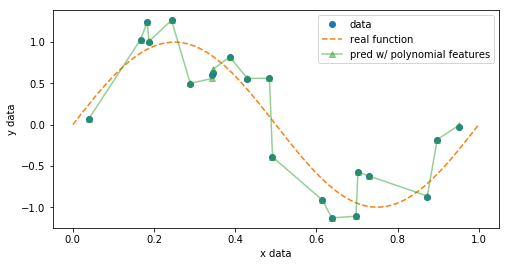

In [8]:
plt.figure(figsize=(8,4))
# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=0.5, label='pred w/ polynomial features')
plt.legend()
plt.xlabel('x data')
plt.ylabel('y data')


***Exercise:***

What can you observe from the graph about the linear regression model trained with 20th degree polynomial features?

<br>
<details>
    <summary>Answer</summary>
<p>
The model overfits the data.
</p>

### 1.4. Use Regularized Model

Now we will try to use the regularized model such as Ridge and Lasso to fit the data with 20th degree polynomial features and observe the difference. 

***Exercise:***

- Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
- Plot the results, as was done in section 1.3. 

<details>
    <summary>Answer</summary>
<p>

```python
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)
``` 
</p>
</details>


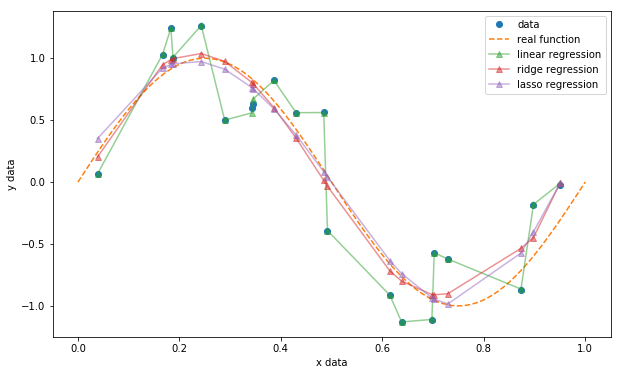

In [9]:
from sklearn.linear_model import Ridge, Lasso

### START CODE HERE ###

# Fit with ridge regression model
#ridge = None 
#Y_pred_rr = None

ridge = Ridge(alpha=0.0001)
ridge = ridge.fit(X_poly, Y_data)
Y_pred_rr = ridge.predict(X_poly)

# Similarly, fit the data with lasso regression model

#lassor = None 
#Y_pred_lr = lassor.predict(None)

lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

### END CODE HERE ###

# The plot of the predicted values
plt.figure(figsize=(10,6))
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)
plt.xlabel('x data')
plt.ylabel('y data')
plt.legend()


In [10]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = ridge.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.777551e+13,4.545873,2.167284
std,6.031941e+13,5.094313,4.706731
min,1.619371e+07,0.000000,0.000000
25%,3.416390e+12,2.010479,0.000000
50%,3.621188e+13,3.259910,0.252181
75%,1.070540e+14,4.539545,1.641353
max,1.655347e+14,23.075093,20.176708


Here we plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients is plot using its own y-axis due to their much larger magnitude. 

In [11]:
lr.coef_.ravel().shape

(21,)

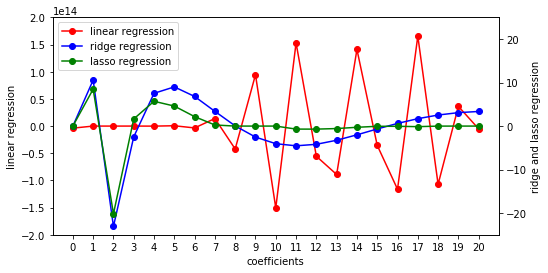

In [12]:
# Setup the dual y-axes

fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()

# Plot the coefficients of unregularized linear regression model 
# Note: lr.coef_ is a 2-D tensor of shape(1,20)
# we need to change it to 1-D array for plotting by calling .ravel()
ax1.plot(lr.coef_.ravel(), 
         color='r', marker='o', label='linear regression')

# Plot the coefficients of ridge model
ax2.plot(ridge.coef_.ravel(), 
         color='b', marker='o', label='ridge regression')

# Plot the coefficients of lassor model
ax2.plot(lassor.coef_.ravel(), 
         color='g', marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)   # for unregularized linear regression 
ax2.set_ylim(-25, 25)       # for regularized linear regression

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_.ravel())));


***Exercises:***

- What is the effect of regularization on the size of the coefficients?

<br>
<details>
    <summary>Answer</summary>
<p>
Regularization shrinks the size of coefficients to avoid overfitting
</p>
</details>
<br>

- Which (Ridge or Lasso) regularization make most of the coefficients goes to 0?

<br>
<details>
    <summary>Answer</summary>
<p>
Lasso
</p>
</details>